Amazon Recommandation System

# Dataset columns​ -
    **  first three columns are userId, productId, and ratings and the fourth column is timestamp.We discard the timestamp column because we dont use it.

# Source​ - 
    ** Amazon Reviews data (https://www.kaggle.com/datasets/saurav9786/amazon-product-reviews). We used electronics.

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import surprise as sp
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy

# Read and explore the dataset  ( Rename column/add headers, plot histograms, find data characteristics) 

In [7]:
import pandas as pd

columns = ['userID', 'productID', 'ratings', 'timestamp']
file_path = r'C:\Users\Admin\Desktop\Product-Recommendation-Systems-master\Electronics.csv'

try:
    recomm_df = pd.read_csv(file_path, names=columns)
    print("File loaded successfully")
except FileNotFoundError:
    print(f"File not found: {file_path}")

File loaded successfully


In [8]:
recomm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userID     object 
 1   productID  object 
 2   ratings    float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [9]:
recomm_df.head()

,userID,productID,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [10]:
recomm_df.shape

(7824482, 4)

In [11]:
recomm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


#  Dropping the "timestamp" as it is not a needed field

In [12]:
recomm_df = recomm_df.drop('timestamp', axis=1)

# Missing Value

In [13]:
recomm_df.isna().sum()

userID       0
productID    0
ratings      0
dtype: int64

In [14]:
recomm_df.shape

(7824482, 3)

# plot histograms

array([[<Axes: title={'center': 'ratings'}>]], dtype=object)

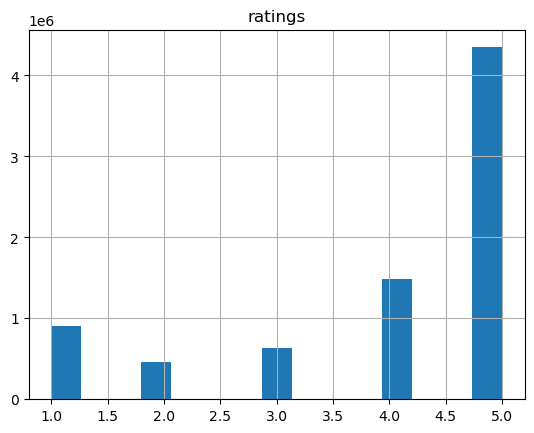

In [15]:
recomm_df.hist('ratings',bins = 15)

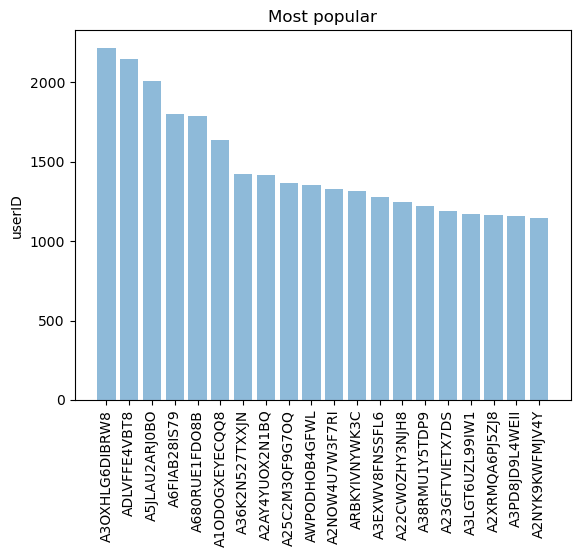

In [16]:
popular = recomm_df[['userID','ratings']].groupby('userID').sum().reset_index()
popular_20 = popular.sort_values('ratings', ascending=False).head(n=20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = (list(popular_20['userID']))
y_pos = np.arange(len(objects))
performance = list(popular_20['ratings'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('userID')
plt.title('Most popular')
 
plt.show() # Most popular users

In [17]:
# find unique users
recomm_df.userID.value_counts()  # 4201696

userID
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A1IUWX30VMVJGP      1
A1WBP7XSZI6AUL      1
A2K7UNJHE9ZR0G      1
A1A6SIW6EWF6FP      1
A10M2KEFPEQDHN      1
Name: count, Length: 4201696, dtype: int64

In [18]:
print('Number of unique users', len(recomm_df['userID'].unique())) # kaç unique user var

Number of unique users 4201696


In [19]:
print('Number of unique products', len(recomm_df['productID'].unique())) # kaç unique product var

Number of unique products 476002


In [20]:
print('Unique Ratings', recomm_df['ratings'].unique()) # kaç unique rating var

Unique Ratings [5. 1. 3. 2. 4.]


In [21]:
min_ratings1 = recomm_df[(recomm_df['ratings'] < 2.0)] # 1.0 ve 1.5 rating alanlar

In [22]:
print('Number of unique products rated low',len(min_ratings1['productID'].unique())) # 1.0 ve 1.5 rating alan unique product sayısı

Number of unique products rated low 176283


In [23]:
med_ratings1 = recomm_df[(recomm_df['ratings'] > 2.0) & (recomm_df['ratings'] < 4.0)] # 2.5 ve 3.0 rating alanlar

In [24]:
print('Number of unique products rated medium',len(med_ratings1['productID'].unique())) # 2.5 ve 3.0 rating alan unique product sayısı

Number of unique products rated medium 152827


In [25]:
max_ratings1 = recomm_df[recomm_df['ratings'] >= 4.0] # 3.5 ve 4.0 rating alanlar

In [26]:
print('Number of unique products rated high',len(max_ratings1['productID'].unique())) # 3.5 ve 4.0 rating alan unique product sayısı

Number of unique products rated high 410110


In [27]:
avg_rating_prod = recomm_df.groupby('productID')['ratings'].mean() # her bir product için ortalama rating

print(avg_rating_prod)

productID
0132793040    5.000000
0321732944    5.000000
0439886341    1.666667
0511189877    4.500000
0528881469    2.851852
                ...   
BT008G3W52    5.000000
BT008SXQ4C    1.000000
BT008T2BGK    5.000000
BT008UKTMW    4.000000
BT008V9J9U    5.000000
Name: ratings, Length: 476002, dtype: float64


In [28]:

avg_rating_prod = recomm_df.groupby('productID')['ratings'].mean() 
avg_rating_prod = avg_rating_prod.reset_index()
print(avg_rating_prod.head())

    productID   ratings
0  0132793040  5.000000
1  0321732944  5.000000
2  0439886341  1.666667
3  0511189877  4.500000
4  0528881469  2.851852


In [29]:
print ('Top 10 highly rated products \n',recomm_df.nlargest(10,'ratings')) # en yüksek rating alan 10 ürün

Top 10 highly rated products 
             userID   productID  ratings
0    AKM1MP6P0OYPR  0132793040      5.0
1   A2CX7LUOHB2NDG  0321732944      5.0
5   A1QGNMC6O1VW39  0511189877      5.0
7   A2TY0BTJOTENPG  0511189877      5.0
8   A34ATBPOK6HCHY  0511189877      5.0
9    A89DO69P0XZ27  0511189877      5.0
10   AZYNQZ94U6VDB  0511189877      5.0
11  A1DA3W4GTFXP6O  0528881469      5.0
13   AO94DHGC771SJ  0528881469      5.0
20  A37K02NKUIT68K  0528881469      5.0


# Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [30]:
print(recomm_df.columns)
correct_column_name = 'userId'
recomm_df.rename(columns={'userId': correct_column_name}, inplace=True)

Index(['userID', 'productID', 'ratings'], dtype='object')


In [37]:
userID = recomm_df.groupby('userID').count() 
top_user = userID[userID['ratings'] >= 50].index # 50'den fazla rating alan userlar
topuser_ratings_df = recomm_df[recomm_df['userID'].isin(top_user)] # 50'den fazla rating alan userların ratingleri

In [38]:
topuser_ratings_df.shape # 50'den fazla rating alan userların rating sayısı

(125871, 3)

In [39]:
topuser_ratings_df.head() 

,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [40]:
topuser_ratings_df.sort_values(by='ratings', ascending=False).head() # en yüksek rating alan userlar

,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
4256669,A680RUE1FDO8B,B004M8RWDE,5.0
4258497,AOMEH9W6LHC4S,B004M8SBNE,5.0
4258199,A2GKMXRLI7KLFP,B004M8SBD4,5.0
4258099,A1UNJ46NSB352E,B004M8SBCK,5.0



# We kept data only for products that have 50 or more ratings

In [41]:
prodID = recomm_df.groupby('productID').count()  

In [42]:
top_prod = prodID[prodID['ratings'] >= 50].index 

In [43]:
top_ratings_df = topuser_ratings_df[topuser_ratings_df['productID'].isin(top_prod)]

In [44]:
top_ratings_df.sort_values(by='ratings', ascending=False).head()

,userID,productID,ratings
492,A3CLWR1UUZT6TG,0972683275,5.0
4220481,A2AY4YUOX2N1BQ,B004KJE8FU,5.0
4217715,A2Q204DY2L7YRP,B004K8WPUQ,5.0
4218748,A87CILADRIZW0,B004KA8Y4U,5.0
4219205,A11KZ906QD08C5,B004KCI80I,5.0


In [45]:
top_ratings_df.shape

(79182, 3)

# Split the data randomly into train and test dataset. We split 80/20

In [46]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(top_ratings_df, test_size = 0.20, random_state=0)

In [47]:
train_data.head()

,userID,productID,ratings
837326,A15T9G38F589KM,B000E6NGBU,5.0
5411754,AUK79PXTAOJP9,B006JMI604,5.0
6059888,A2WB7LZ595CR50,B00846Z34K,1.0
773127,A2FHTXLKY1XJDB,B000BQ7GW8,3.0
4947985,A2OOLI2WFY4L2,B005GTO07O,4.0


In [48]:
test_data.head()

,userID,productID,ratings
6562653,AWH2AY17ZU7W2,B009A6CZ30,5.0
1001830,A1SHHQSPOWR00F,B000HGIWN4,3.0
3904732,A1PVJICI412IN4,B00466X9SY,5.0
7600678,AGYH5U11ZKPFB,B00F3ZN0CC,4.0
2743475,AMKNPIDFLRFMP,B002O3W2OI,2.0


# Building Popularity Recommender model.

In [49]:
train_data['ratings'] = pd.to_numeric(train_data['ratings'], errors='coerce')

#Drop rows with NaN values in 'ratings' column
train_data = train_data.dropna(subset=['ratings'])


#Group by 'productID' and calculate the mean of 'ratings'
train_data_grouped = train_data.groupby('productID')['ratings'].mean().reset_index()


print(train_data_grouped)

        productID   ratings
0      0972683275  4.500000
1      1400501466  3.333333
2      1400501520  5.000000
3      1400501776  4.000000
4      1400532620  1.000000
...           ...       ...
15668  B00K7O2DJU  5.000000
15669  B00K91DB7Y  3.875000
15670  B00KFAGCUM  4.833333
15671  B00KWHMR6G  2.000000
15672  B00L3YHF6O  5.000000

[15673 rows x 2 columns]


In [50]:
train_data_grouped.head()

,productID,ratings
0,0972683275,4.500000
1,1400501466,3.333333
2,1400501520,5.000000
3,1400501776,4.000000
4,1400532620,1.000000


In [51]:
train_data_sort = train_data_grouped.sort_values(['ratings', 'productID'], ascending=False)  

In [52]:
train_data_sort.head()

,productID,ratings
15672,B00L3YHF6O,5.0
15668,B00K7O2DJU,5.0
15667,B00K4VQZCM,5.0
15666,B00K0OBEE2,5.0
15662,B00JLADOGW,5.0


In [53]:
train_data.groupby('productID')['ratings'].count().sort_values(ascending=False).head(10)   # en çok rating alan 10 ürün

productID
B0088CJT4U    162
B003ES5ZUU    146
B007WTAJTO    139
B000N99BBC    132
B00829TIEK    118
B00829THK0    113
B008DWCRQW    111
B002R5AM7C    108
B004CLYEDC     94
B002SZEOLG     88
Name: ratings, dtype: int64

In [54]:
ratings_mean_count = pd.DataFrame(train_data.groupby('productID')['ratings'].mean())   # her bir ürün için ortalama rating

In [55]:
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('productID')['ratings'].count())  

In [56]:
ratings_mean_count.head()  

,ratings,rating_counts
productID,,
0972683275,4.500000,2
1400501466,3.333333,6
1400501520,5.000000,1
1400501776,4.000000,1
1400532620,1.000000,1


In [57]:
pred_df = test_data[['productID', 'ratings']]

In [58]:
pred_df.rename(columns = {'ratings' : 'true_ratings'}, inplace=True)

In [59]:
pred_df = pred_df.merge(train_data_sort, left_on='productID', right_on = 'productID')

In [60]:
pred_df.head(3)

,productID,true_ratings,ratings
0,B009A6CZ30,5.0,4.52381
1,B009A6CZ30,4.0,4.52381
2,B009A6CZ30,5.0,4.52381


In [61]:
pred_df.rename(columns = {'ratings' : 'predicted_ratings'}, inplace = True)

In [62]:
pred_df.head()

,productID,true_ratings,predicted_ratings
0,B009A6CZ30,5.0,4.523810
1,B009A6CZ30,4.0,4.523810
2,B009A6CZ30,5.0,4.523810
3,B009A6CZ30,5.0,4.523810
4,B000HGIWN4,3.0,4.857143


In [63]:
import sklearn.metrics as metric
from math import sqrt
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.0815377502945511


**The RMSE value for Popularity Recommender model is 1.0815**

# Build Collaborative Filtering model

In [82]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, SVD, SVDpp, CoClustering, NMF, SlopeOne

In [83]:
reader = Reader(rating_scale=(1, 5))

# We convert Pandas Daataframe to Surpise format

In [84]:
data = Dataset.load_from_df(train_data[['userID', 'productID', 'ratings']], reader)

In [85]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

In [86]:
type(trainset)

surprise.trainset.Trainset

# Training the model

**KNNWithMeans**

In [115]:
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


**SVD**

In [116]:
def evaluate_algorithms(data):
    algorithms = {
        'KNN Basic': KNNBasic(),
        'KNN With Means': KNNWithMeans(),
        'KNN With ZScore': KNNWithZScore(),
        'SVD': SVD(),
        'SVDpp': SVDpp(),
    }

   

In [117]:
param_grid = {
    'n_epochs': [20, 25], # number of iterations
    'lr_all': [0.007, 0.009, 0.01], # learning rate
    'reg_all': [0.4, 0.6] # regularization term
    }

In [118]:
gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1) # cross-validation
gs_svd.fit(data)

#Perform grid search for SVDpp
gs_svdpp = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1) 
gs_svdpp.fit(data)

#Best results
print('Best RMSE for SVD:', gs_svd.best_score['rmse'])
print('Best parameters for SVD:', gs_svd.best_params['rmse'])
print('Best RMSE for SVDpp:', gs_svdpp.best_score['rmse'])
print('Best parameters for SVDpp:', gs_svdpp.best_params['rmse'])

Best RMSE for SVD: 0.9572690395866879
Best parameters for SVD: {'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.4}
Best RMSE for SVDpp: 0.9569773590616748
Best parameters for SVDpp: {'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.4}


In [119]:
#Train best SVD model
best_svd = gs_svd.best_estimator['rmse']
best_svd.fit(trainset)

#Train best SVDpp model
best_svdpp = gs_svdpp.best_estimator['rmse']
best_svdpp.fit(trainset)

#Evaluate on the test set
predictions_svd = best_svd.test(testset)
print('Test RMSE for SVD:', accuracy.rmse(predictions_svd))

predictions_svdpp = best_svdpp.test(testset)
print('Test RMSE for SVDpp:', accuracy.rmse(predictions_svdpp))

RMSE: 0.9668
Test RMSE for SVD: 0.9668111530239378
RMSE: 0.9665
Test RMSE for SVDpp: 0.9664668274890149


 **Popularity Recommender Model (RMSE)**


In [120]:
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.0815377502945511


**Collaborative Filtering Recommender Model (RMSE)**

In [121]:
print(len(testset))
type(testset)

19004


list

**KNNWithMeans**

In [122]:
# Evalute on test set
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid='A2XHOLOLKGV1FE', iid='B000NDA5E0', r_ui=4.0, est=2.789473684210526, details={'actual_k': 0, 'was_impossible': False})

In [96]:
# compute RMSE
accuracy.rmse(test_pred) #range of value of error

RMSE: 1.0016


1.0015950381186367

**SVD**

In [123]:
best_svd = gs_svd.best_estimator['rmse']
best_svd.fit(trainset)


In [124]:
#Train best SVDpp model
predictions_svd = best_svd.test(testset)
print('Test RMSE for SVD:', accuracy.rmse(predictions_svd))

RMSE: 0.9675
Test RMSE for SVD: 0.9675483811431123


 **Parameter tuning of SVD Recommendation system**

In [125]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [126]:
gs.fit(data)

In [127]:
# get best parameters
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [128]:
# Use the "best model" for prediction
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.8608


0.8608374806356534

**The RMSE value for Collaborative Filtering model, byKNNWithMeans is 1.0015950381186367 and SVD is 0.9672121554841631. After parameter tuning of SVD it is 0.8612**

# Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [129]:
from collections import defaultdict
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [130]:
top_n = get_top_n(test_pred, n=5)

In [131]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A2XHOLOLKGV1FE ['B0076LY7UK', 'B0077R2B9M', 'B004T1YA5W', 'B000NDA5E0', 'B00429N18S']
A1PL7QILVQV3IF ['B007M4M3NO', 'B000B8IHDS', 'B00829THK0', 'B000JE7GPY', 'B000R6QAHY']
AY6A8KPYCE6B0 ['B0000E1717', 'B004YIFP9K', 'B0056YNA1Q', 'B00CD8ADKO', 'B0041OMWNY']
A2J0IBS4PFRO2C ['B000OK2X6K', 'B0007Z1M50', 'B000A3WS84', 'B0000C4G79', 'B003VNKKRG']
A21T0D2F7SKG5S ['B001GO5TU0', 'B006QB1RPY', 'B000BH5OW6', 'B0002Y5WXE', 'B00009R6VZ']
A1U5NWJOYH2QQH ['B008J127VC', 'B0001WXTF0', 'B000A4AVQO', 'B00011Y1MQ', 'B0007P11M4']
A30J7WQV0ZNRXG ['B006RG0QC8', 'B0013FRNKG', 'B00COEBCXY', 'B008H9BXMK', 'B000NK3H4S']
A1R377IPZOKLMM ['B00486MH80', 'B008Q7HUR0', 'B009A6CZ30', 'B003MQWN40', 'B00DDK1QUC']
A1KXJCXS6HFRQZ ['B000WLWBI6', 'B0001Y7Z4Y', 'B000F1O0X2', 'B001B8EOMU', 'B001DULYZG']
A19W47CXJJP1MI ['B004JF9N1O', 'B000HKGK8Y', 'B000IF51UQ', 'B007FPIQ0E', 'B003M0NURK']
A3J8A5L5AF5TX9 ['B00BCA4116', 'B0016BENZ0', 'B0058SYDTI', 'B004LAEKBU', 'B0017RLFM2']
ATZJNEXX7LWD3 ['B002QEBMAK', 'B001GS8FZ2', 'B004GCJEZU'

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0465  1.0511  1.0397  1.0527  1.0546  1.0489  0.0053  
MAE (testset)     0.7405  0.7466  0.7324  0.7392  0.7383  0.7394  0.0046  
Fit time          0.07    0.10    0.07    0.08    0.08    0.08    0.01    
Test time         0.14    0.17    0.14    0.15    0.14    0.15    0.01    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9539  0.9635  0.9673  0.9742  0.9539  0.9625  0.

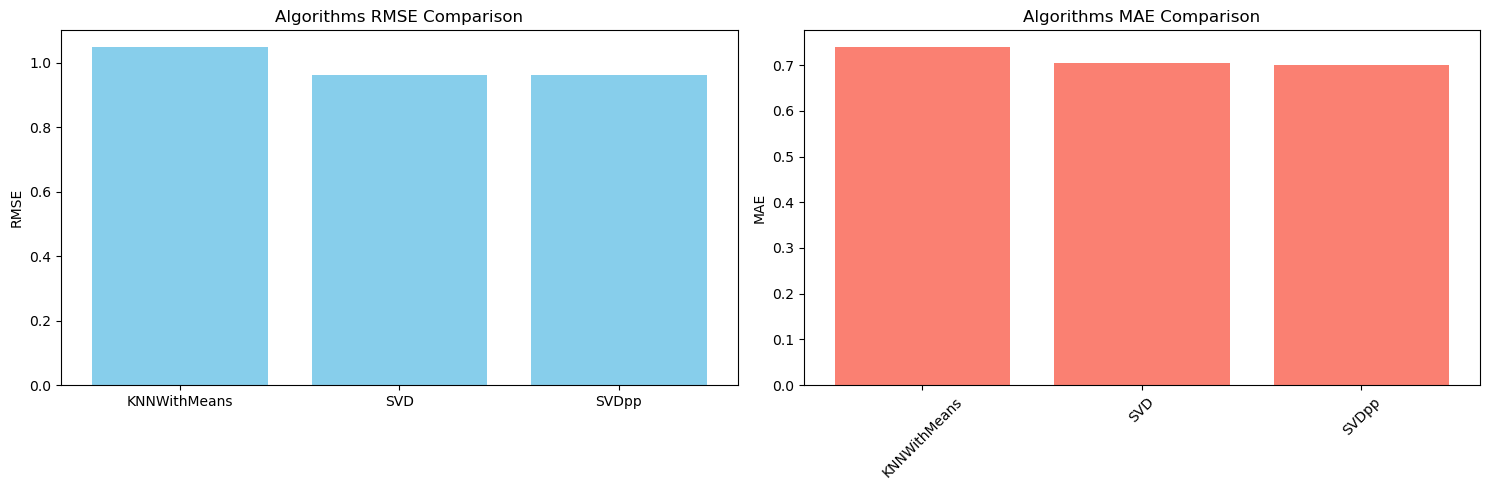

In [135]:
from surprise import SVD, KNNWithMeans, SVDpp
from surprise.model_selection import cross_validate

algorithms = [KNNWithMeans(), SVD(), SVDpp()]

results = {}
for algo in algorithms:
    algo_class_name = type(algo).__name__
    cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    results[algo_class_name] = cv_results

for algo_class_name in results:
    cv_result = results[algo_class_name]
    print(f'{algo_class_name}: RMSE = {round(cv_result["test_rmse"].mean(), 4)}, MAE = {round(cv_result["test_mae"].mean(), 4)}')

import matplotlib.pyplot as plt

rmse_values = [results[name]['test_rmse'].mean() for name in results]
mae_values = [results[name]['test_mae'].mean() for name in results]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(list(results.keys()), rmse_values, color='skyblue')
plt.title('Algorithms RMSE Comparison')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.bar(list(results.keys()), mae_values, color='salmon')
plt.title('Algorithms MAE Comparison')
plt.ylabel('MAE')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()